In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("D:\\DSc\\DS jobs\\Resume\\RELIANCE.NS.csv") 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,444.511475,444.907715,439.632721,440.227081,414.639160,2699496.0
1,2014-01-02,439.682251,443.793274,430.964874,433.391876,408.201263,2779905.0
2,2014-01-03,431.707855,432.574615,423.485779,428.067352,403.186188,5922841.0
3,2014-01-06,427.002441,427.572052,421.009247,423.460999,398.847595,6145266.0
4,2014-01-07,423.287659,425.937531,416.080963,417.096344,392.852875,7989240.0


In [6]:
data = data[['Date','Close']] #Only date and corresponding closing values are required for this
data = data.rename(columns = {'Date':'ds','Close':'y'}) #renaming the columns Date = ds, Close = y

In [25]:
data['ds']=pd.to_datetime(data.ds)

In [28]:
data.dropna(inplace=True)

In [29]:
data.head()

,ds,y
0,2014-01-01,440.227081
1,2014-01-02,433.391876
2,2014-01-03,428.067352
3,2014-01-06,423.460999
4,2014-01-07,417.096344


<AxesSubplot:xlabel='ds'>

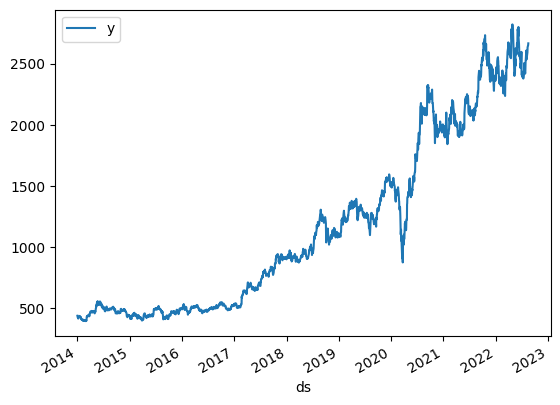

In [31]:
data.plot(x='ds',y='y')

<h1>Splitting the data into training and testing samples.

In [32]:
train=data[:1800]
test=data[1800:]

In [33]:
train.tail()

,ds,y
1797,2021-04-19,1901.699951
1798,2021-04-20,1901.150024
1799,2021-04-22,1906.400024
1800,2021-04-23,1904.349976
1801,2021-04-26,1937.849976


In [34]:
test.head()

,ds,y
1802,2021-04-27,1988.650024
1803,2021-04-28,1997.300049
1804,2021-04-29,2024.050049
1805,2021-04-30,1994.500000
1806,2021-05-03,1959.050049


<h1>Predicting with our prophet

In [46]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [47]:
m=Prophet(seasonality_mode='multiplicative')
m.fit(train)
future=m.make_future_dataframe(periods=328)
forecast=m.predict(future)
forecast.head()

18:28:16 - cmdstanpy - INFO - Chain [1] start processing
18:28:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,472.248614,354.543939,580.059137,472.248614,472.248614,-0.016271,-0.016271,-0.016271,0.009280,0.009280,0.009280,-0.025551,-0.025551,-0.025551,0.0,0.0,0.0,464.564851
1,2014-01-02,472.215676,351.670522,572.641988,472.215676,472.215676,-0.015542,-0.015542,-0.015542,0.010409,0.010409,0.010409,-0.025950,-0.025950,-0.025950,0.0,0.0,0.0,464.876608
2,2014-01-03,472.182737,361.662141,576.697324,472.182737,472.182737,-0.016136,-0.016136,-0.016136,0.010011,0.010011,0.010011,-0.026147,-0.026147,-0.026147,0.0,0.0,0.0,464.563389
3,2014-01-06,472.083921,356.161654,581.176166,472.083921,472.083921,-0.018441,-0.018441,-0.018441,0.007296,0.007296,0.007296,-0.025737,-0.025737,-0.025737,0.0,0.0,0.0,463.378169
4,2014-01-07,472.050982,360.382304,578.568596,472.050982,472.050982,-0.013374,-0.013374,-0.013374,0.011988,0.011988,0.011988,-0.025361,-0.025361,-0.025361,0.0,0.0,0.0,465.737944


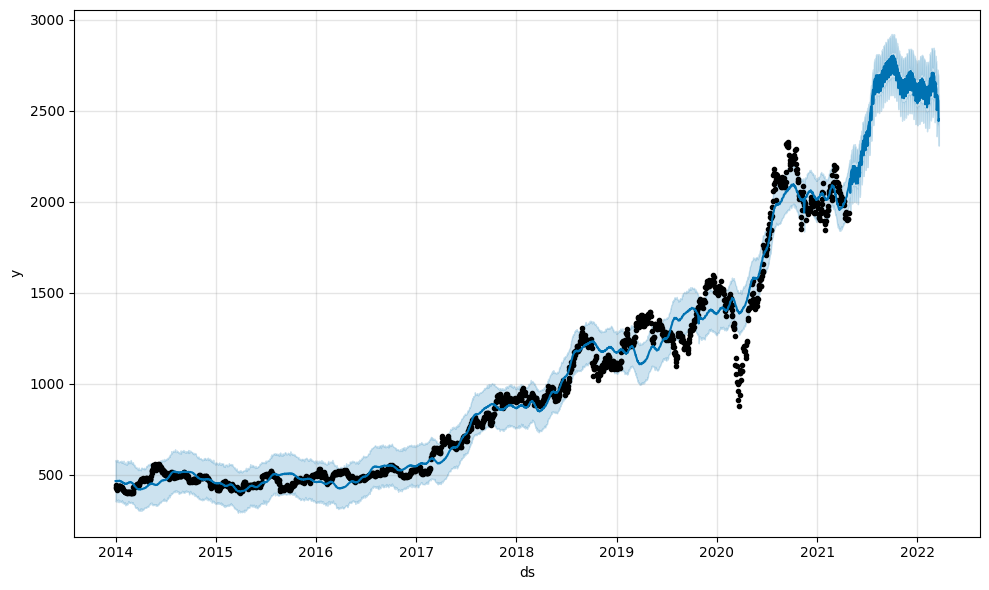

In [48]:
m.plot(forecast, uncertainty=True)
plt.show()

Black Dot : Actual <br>
Blue Line : Predicted

<AxesSubplot:xlabel='ds'>

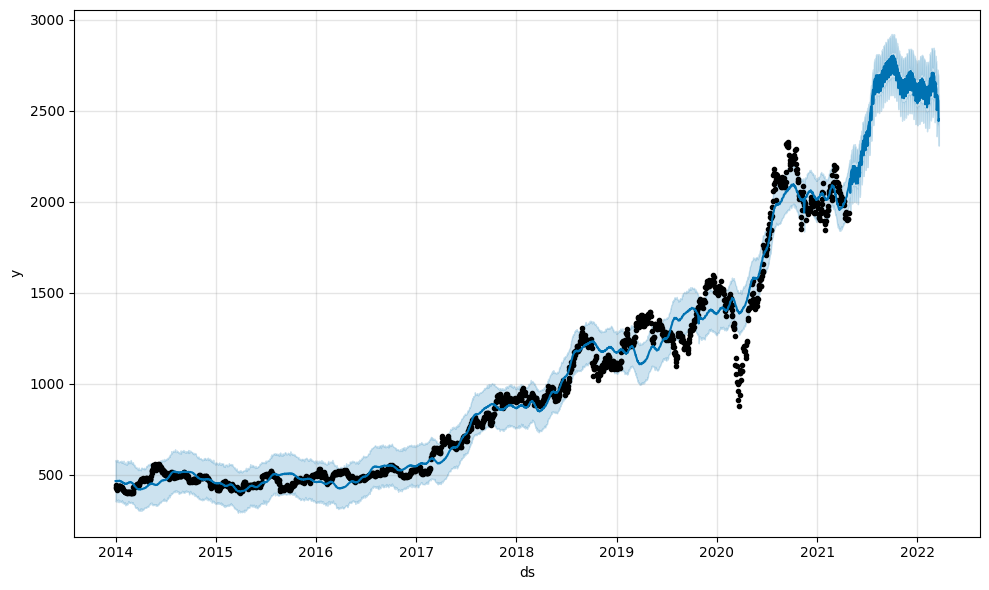

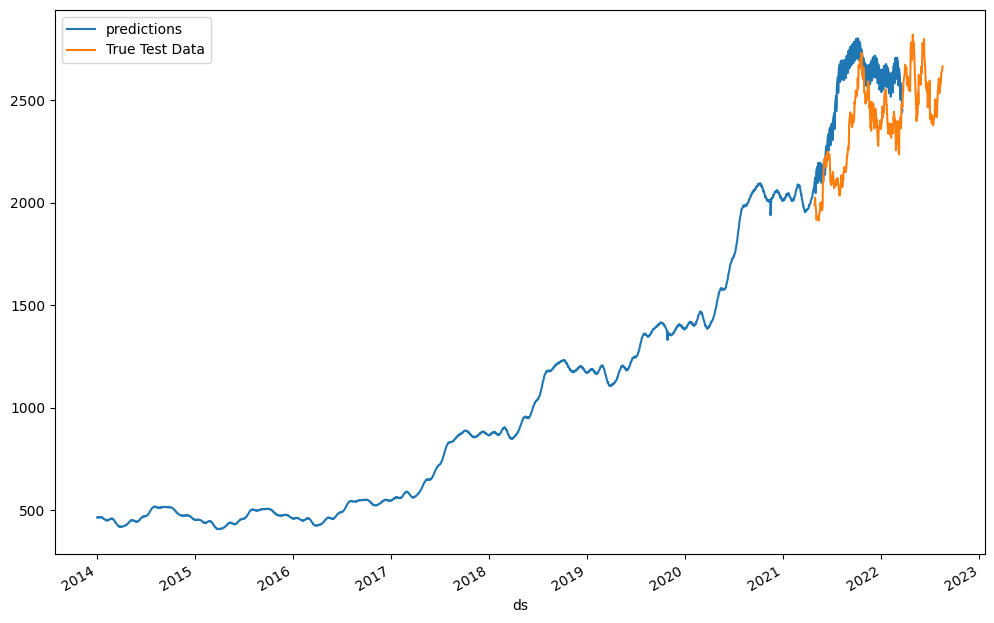

In [50]:
m.plot(forecast)
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax)

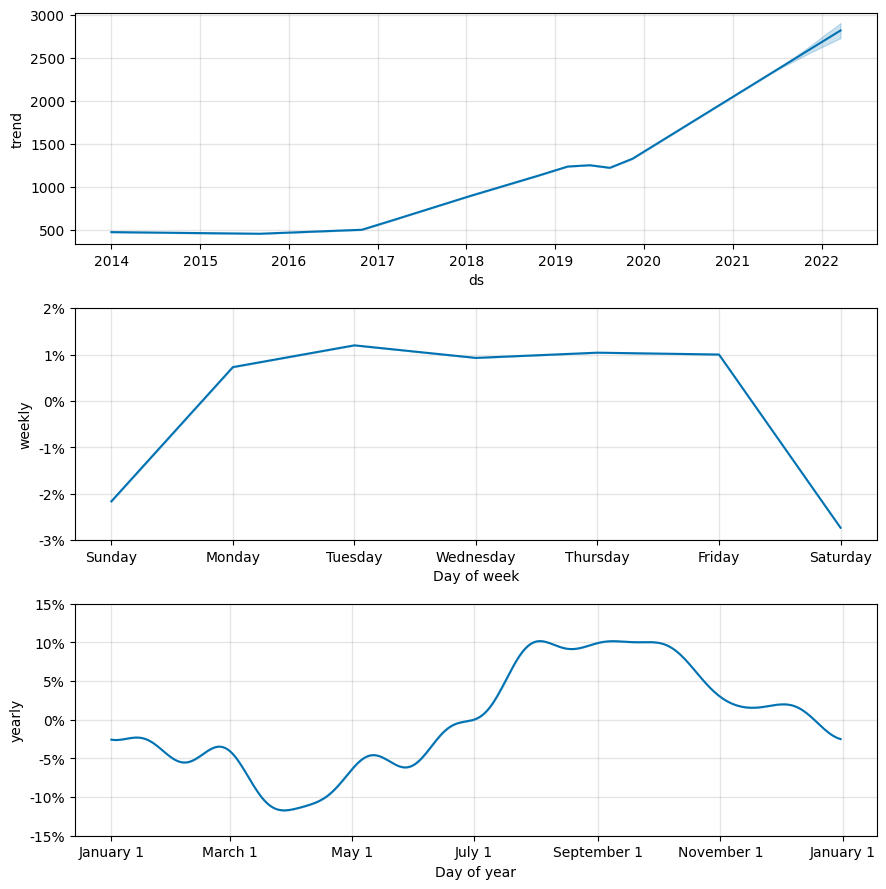

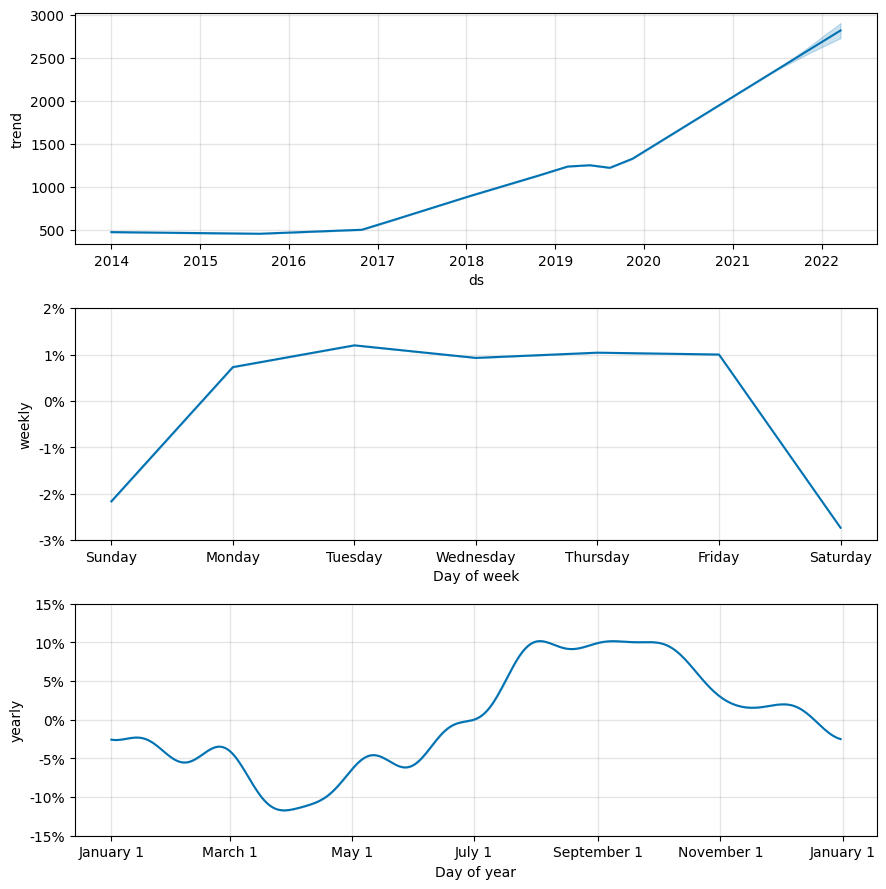

In [51]:
m.plot_components(forecast)

<h1>Performance Metrics:

In [52]:
df_cv = cross_validation(m, horizon = '365 days')
df_cv.head()

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]19:17:04 - cmdstanpy - INFO - Chain [1] start processing
19:17:04 - cmdstanpy - INFO - Chain [1] done processing
 14%|████████████                                                                        | 1/7 [00:01<00:09,  1.51s/it]19:17:06 - cmdstanpy - INFO - Chain [1] start processing
19:17:07 - cmdstanpy - INFO - Chain [1] done processing
 29%|████████████████████████                                                            | 2/7 [00:04<00:10,  2.14s/it]19:17:08 - cmdstanpy - INFO - Chain [1] start processing
19:17:09 - cmdstanpy - INFO - Chain [1] done processing
 43%|████████████████████████████████████                                                | 3/7 [00:06<00:09,  2.28s/it]19:17:11 - cmdstanpy - INFO - Chain [1] start processing
19:17:13 - cmdstanpy - INFO - Chain [1] done processing
 57%|████████████████████████████████████████████████                   

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-04-28,700.227452,683.672610,718.429011,691.049561,2017-04-27
1,2017-05-02,700.991173,684.597073,717.354782,678.840271,2017-04-27
2,2017-05-03,703.834733,686.071359,721.823114,678.617371,2017-04-27
3,2017-05-04,705.896127,688.469966,723.614929,672.599426,2017-04-27
4,2017-05-05,708.651767,691.706978,725.794184,657.888855,2017-04-27


By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.<br><br>
The output of cross_validation is a dataframe with the true values y and the out-of-sample forecast values yhat, at each simulated forecast date and for each cutoff date. In particular, a forecast is made for every observed point between cutoff and cutoff + horizon. This dataframe can then be used to compute error measures of yhat vs. y.

In [53]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days 00:00:00,105056.718458,324.124542,107.725271,0.089006,0.046388,0.086736,0.308140
1,37 days 12:00:00,16285.352558,127.614077,87.529802,0.074729,0.046650,0.077093,0.302326
2,38 days 00:00:00,16409.973601,128.101419,88.686900,0.075559,0.047355,0.077950,0.284884
3,38 days 12:00:00,16823.920315,129.707056,90.102779,0.076674,0.048796,0.079154,0.275194
4,39 days 00:00:00,16959.492696,130.228617,91.301126,0.078047,0.049794,0.080447,0.267442
...,...,...,...,...,...,...,...,...
643,363 days 00:00:00,229373.475149,478.929510,368.436699,0.242506,0.172292,0.241314,0.713178
644,363 days 12:00:00,226901.988466,476.342302,366.890724,0.242210,0.174766,0.240828,0.716570
645,364 days 00:00:00,224182.351170,473.478987,363.642703,0.239557,0.172292,0.238755,0.719477
646,364 days 12:00:00,223380.997236,472.631989,363.257999,0.239570,0.172292,0.238742,0.720930


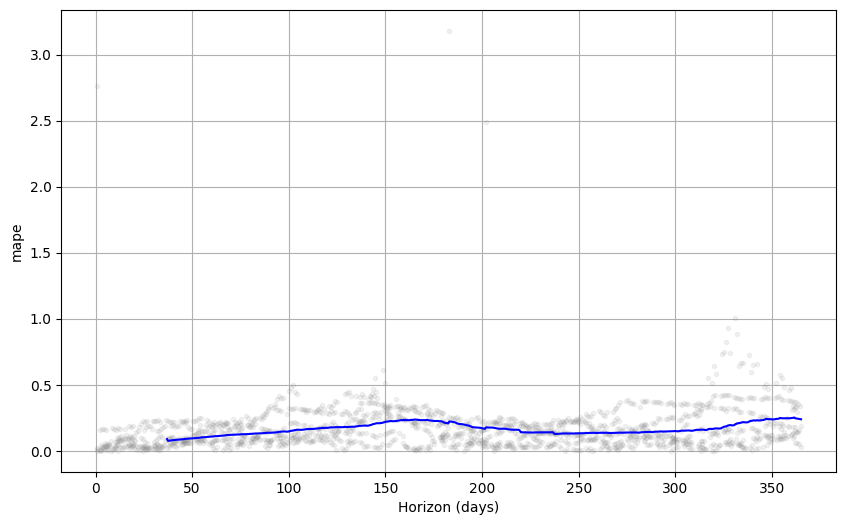

In [56]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

mape : Mean Absolute Percentage Error is below 20 percent

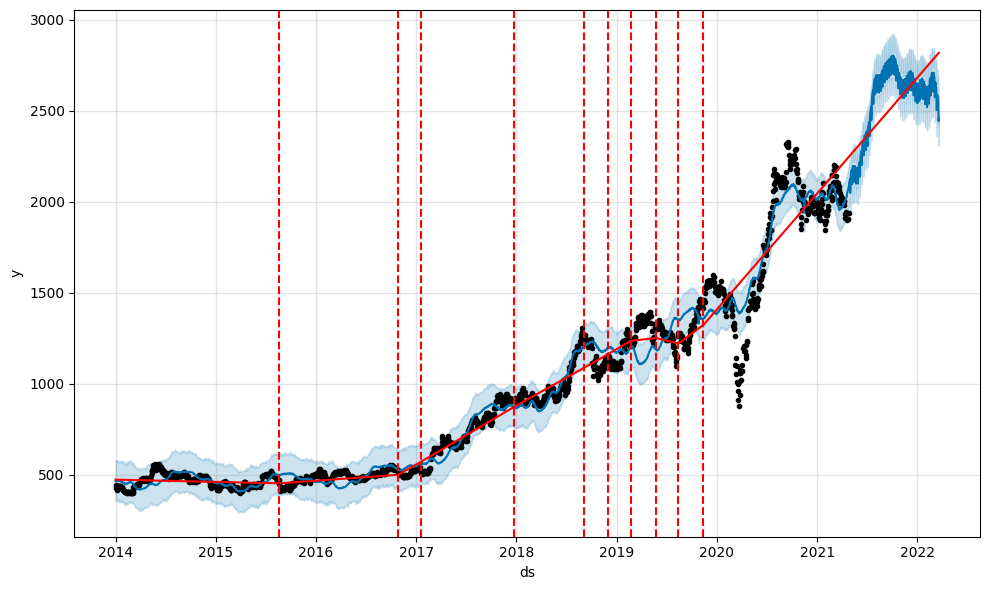

In [57]:
from prophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

These red dotted line show the major points where trendline happens to change.